Hey :) !
So as you asked me id like to tell you what ive learnt abt audio, spectograms and visual representation of them more or less So the way we can use audio in our case is: 

    audio is a digital form, an audio sample is showing how the air preassure changed during the recording
    sample rate shows how many samples we take/sec (Hz)
    Amptitude: how strong the vibration is
    frequency: many vibrations per second -> high pitch
             : few -> low pitch


---------
Spectograms
I mainly was thinking abt Mel spectograms as we were only using that (correct me if im wrong)
    bright colour: high frequencies
    dark : quiet
    vertical lines/ patterns: short sounds
    horizontal lines: sustained tones (dolphin)

Mel spectogram:
    x : Time 
    y: frequency
    colour: loudness

This Mel spectogram (2d array of numbers) will be later normalozed(0-1) and fed to the neural network pixel by pixel (matrix of values)




--------
So at first for setting up everything a quick explanation:
    - installed python 3.13. and jupyter notebook
   
    - installed libraries (that you asked):
                
          - librosa: for audio analysis, Mel spectograms
        
          - numPy: handles audios as numerical arrays
        
          - Matplotlib: for data visualization
        
          - SciPy: low level audio operations, signal processing
        
          - SoundFile: reading and writing WAV files


than as you'll see in the code ive downloaded random sounds in the training data folder mainly from here: https://samplefocus.com/categories/nature

from now on gonna use the audios u shared


In [ ]:
# !pip install librosa scipy numpy matplotlib soundfile


In [73]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

I dont rlly understand how you want to use relative directories. I tried only putting "training/training data/file_example_WAV_5MG.wav", having the notebook and the training data file in the same folder while in the right folder (PS D:\Internships\INMAR\training>). Didnt work. Helpme :o

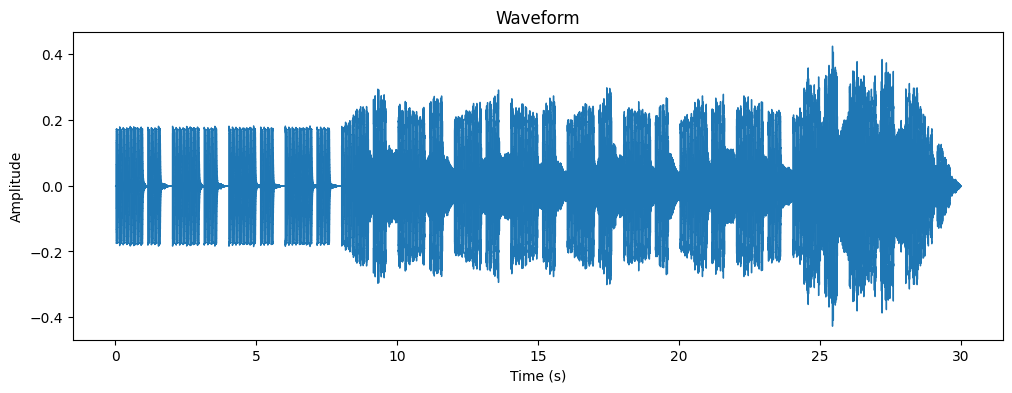

In [74]:
# Load an audio file
audio_path = "D:/Internships/INMAR/training/training data/file_example_WAV_5MG.wav"
y, sr = librosa.load(audio_path, sr=None)

# Plot waveform, just trying it no explanation cuz i dont find waveforms relevant for us
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

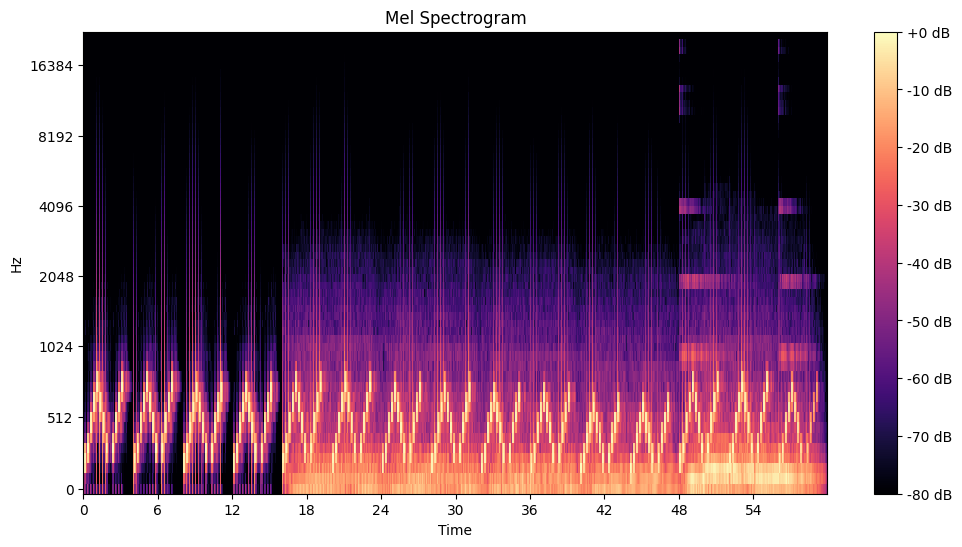

In [ ]:
# Create a Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=1024, hop_length=256)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

#displaying the audio
import IPython.display as ipd
import librosa
ipd.Audio(y, rate=sr)

X(time) progression of the audio

Y(frequency) range of frequencies. Mel scale -> logarithmic -> better perception for human

colour represents the loudness in dB:
bright colours strong/loud frequencies
dark colours weak or silent frequencies

---
in this case of the spectogram you can see the notes visually. The notes form definite squares with bright colour, showing that its a strong and stable note. In the middle we can start to hear a low frequency base and it shows on the bottom of the spectogram aswell. in the very end we can hear a bell aswell which also shows in multiple frequencies

--- 
the functions (also in the rest of the code, so only gonna explain it once):

---
"S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)":

y: audio time series (array of audio samples)

sr: sampling rate of the audio (samples/sec)

n_mels=128: frequency resolution. higher number higher resolution 

n_fft=1024 (standard value = 2048): frequency resolution

hop_length=256 (standard value = 512): time resolution

---
"S_dB = librosa.power_to_db(S, ref=np.max)":

librosa.power_to_db: converts the power spectogram into decibels for better perceive

ref=np.max: normalization

---
"plt.figure(figsize=(12, 6)) : size of the spectogram

librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')

plt.colorbar(format='%+2.0f dB')":

librosa.display.specshow: display image as spectogram

x_axis='time': Horizontal time (seconds)

y_axis='mel': Vertical Mel frequencies

plt.colorbar(format='%+2.0f dB'): color bar showing amplitude in dB

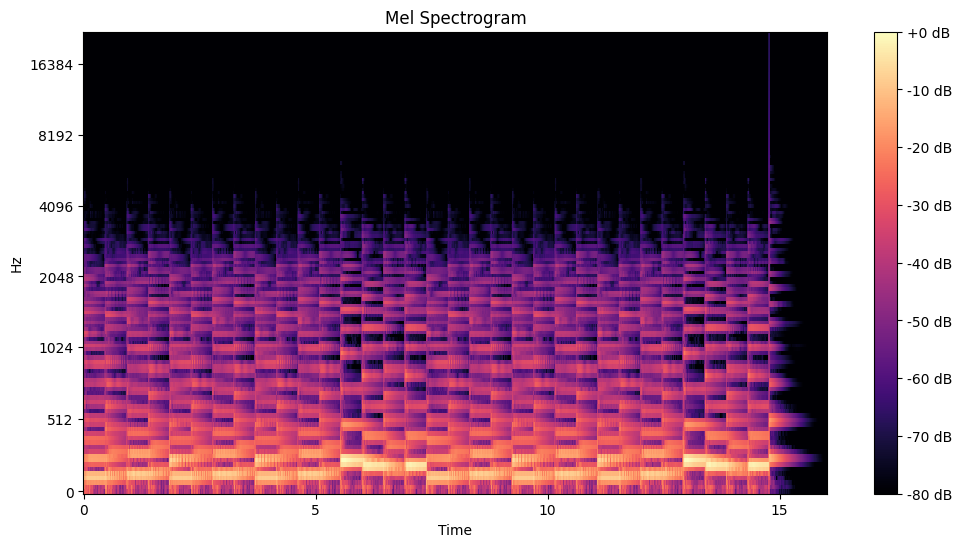

In [76]:
audio_path_2 = "D:/Internships/INMAR/training/training data/piano.wav"
y, sr = librosa.load(audio_path_2, sr=None)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()
ipd.Audio(y, rate=sr)

in this case we can see the low frequency notes in the bottom of the spectogramm. Not a good example tho

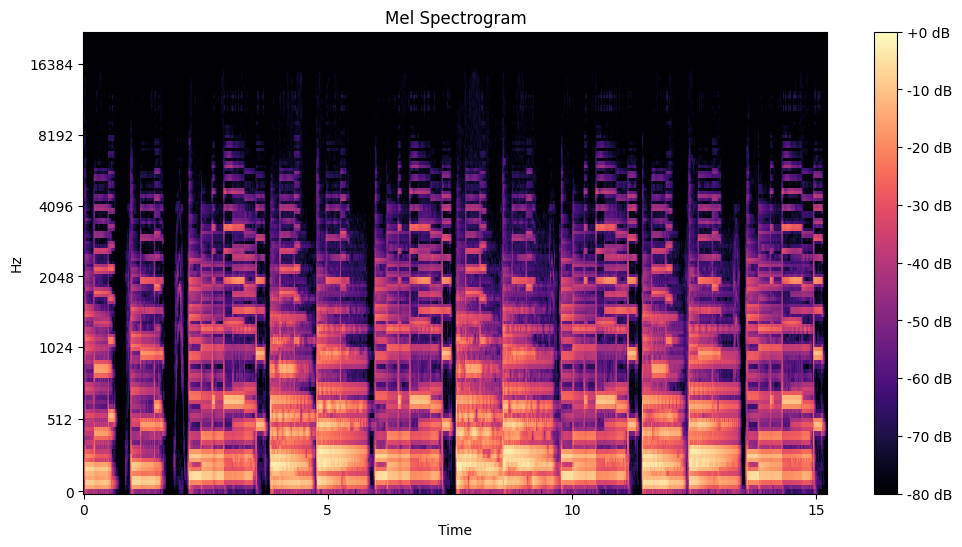

In [77]:
audio_path_3 = "D:/Internships/INMAR/training/training data/guitar.wav"
y, sr = librosa.load(audio_path_3, sr=None)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()
ipd.Audio(y, rate=sr)

the final music-like spectogram. again we can see the strong notes, but i dont think Mel spectograms are fitting for music or song analysis

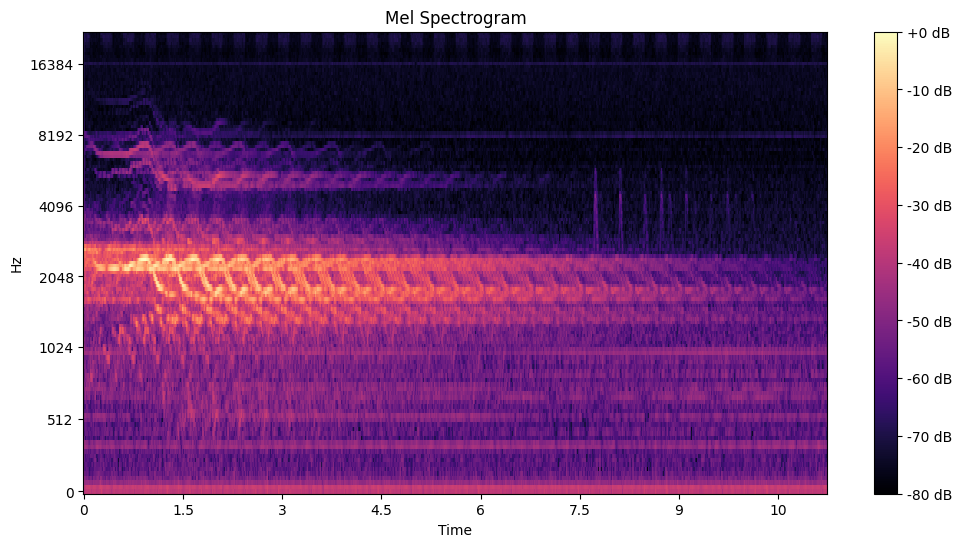

In [78]:
audio_path_4 = "D:/Internships/INMAR/training/training data/eagle.wav"
y, sr = librosa.load(audio_path_4, sr=None)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()
ipd.Audio(y, rate=sr)

this one is some kind of bird ig. its super interesting as you can see the wave of the frequency as we can hear it aswell

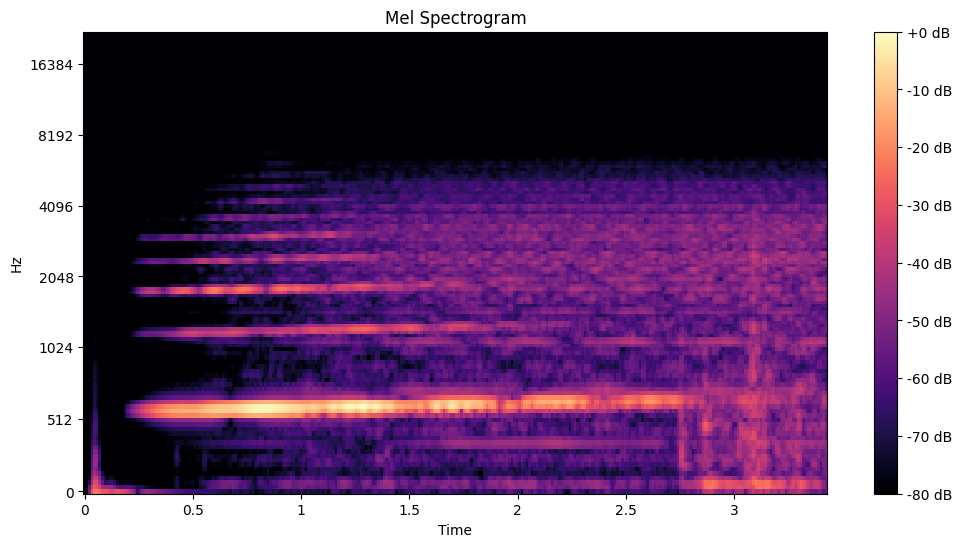

In [79]:
audio_path_5 = "D:/Internships/INMAR/training/training data/whale.wav"
y, sr = librosa.load(audio_path_5, sr=None)

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()
ipd.Audio(y, rate=sr)

in this short one we can hear a whale. you can see the definite straight line and it moving upwards a bit, just like we hear it in the audio. we can see the rumbling sound in the end aswell

Questions:

Abt markdown: is there any way i can better format it? for example bullet points. if yes ill look for more vids.

Which spectogramm do you reccomend? I read that Log-frequency spectogram is good for enviromental analysis.

---
Summary: 
Audios can be represented as numerical arrays and visualized as waveforms or spectograms. I particularry find Mel spectograms cooool, cuz I believe the sound patterns for each biophony, geophony or anthrophony sounds are different, therefore it is easy to feed the 2d matrix to do NN, and learn the patterns.
waveforms however are not as useful for us cuz we need frequency

we could use STFT, but it doesnt match human hearing perception, and to review the results we need a logarithmic and not lineral frequency scale


---
so yeah ive been mainly testing diff sounds, i found them rlly cool, and i think now we could go to the next step :)